In [12]:
import pandas as pd
import numpy as np
import glob
import os
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from fancyimpute import KNN (add package and remove comment)

Retained features:
['HR' 'O2Sat' 'SBP' 'MAP' 'DBP' 'Resp' 'Age' 'Gender' 'HospAdmTime'
 'ICULOS' 'Hours' 'Identifier' 'SepsisLabel']


,HR,O2Sat,SBP,MAP,DBP,Resp,Age,Gender,HospAdmTime,ICULOS,Hours,Identifier,SepsisLabel
0,99.750447,97.011861,122.50369,79.431089,60.611111,22.051676,83.14,0,-0.03,1,0,p000001,0
1,97.000000,95.000000,98.00000,75.330000,60.611111,19.000000,83.14,0,-0.03,2,1,p000001,0
2,89.000000,99.000000,122.00000,86.000000,60.611111,22.000000,83.14,0,-0.03,3,2,p000001,0
3,90.000000,95.000000,122.50369,79.431089,60.611111,30.000000,83.14,0,-0.03,4,3,p000001,0
4,103.000000,88.500000,122.00000,91.330000,60.611111,24.500000,83.14,0,-0.03,5,4,p000001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,72.500000,94.500000,140.00000,85.500000,56.000000,29.000000,45.82,0,-1195.71,19,18,p000003,0
19,72.000000,96.000000,147.00000,84.000000,54.000000,20.000000,45.82,0,-1195.71,20,19,p000003,0
20,75.000000,97.000000,150.00000,86.000000,55.000000,22.000000,45.82,0,-1195.71,21,20,p000003,0
21,81.500000,95.500000,155.00000,93.500000,62.500000,20.500000,45.82,0,-1195.71,22,21,p000003,0


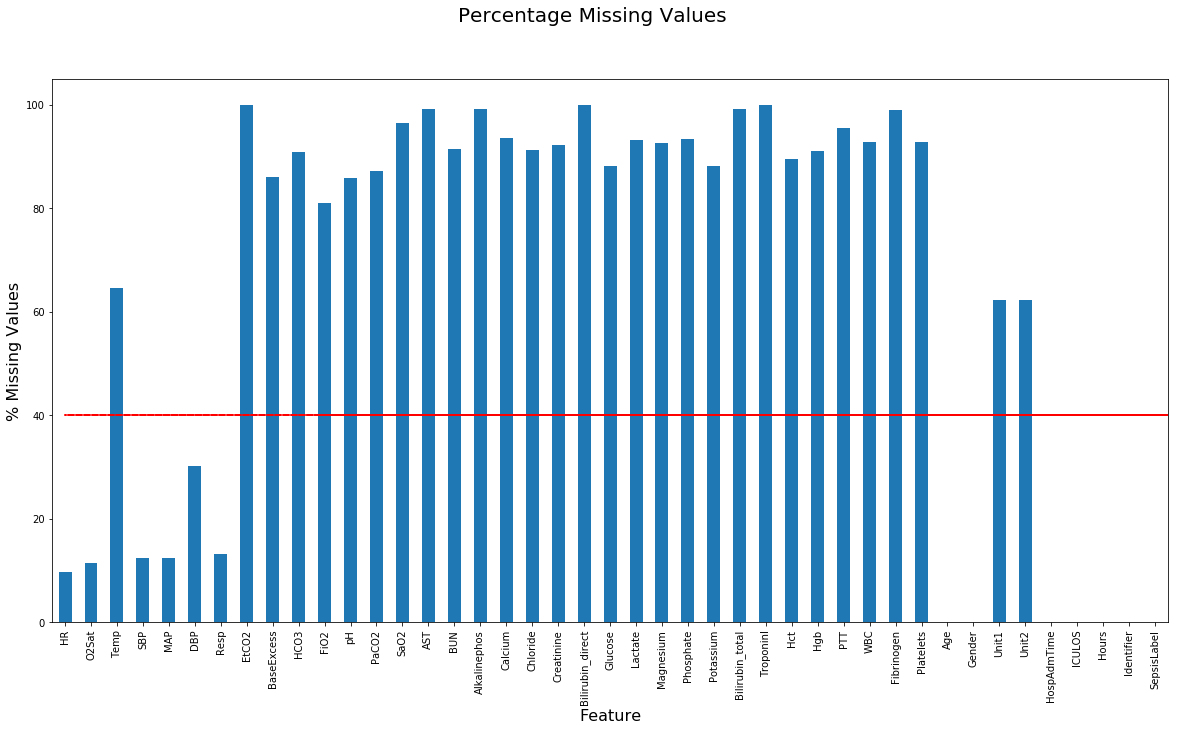

In [20]:
# Read data ann impute missing values
path = os.getcwd() + os.path.normpath('/Data')
all_files = glob.glob(path + '/*.psv')


df = pd.DataFrame()

for file in glob.iglob(path + os.path.normpath('/*.psv')):
    f_name = os.path.splitext(os.path.basename(file))[0] 
    tempdf = pd.read_csv(file, sep = '|', index_col = None, header = 0)    
    tempdf['Hours'] = tempdf.index
    tempdf['Identifier'] = f_name  
    df = pd.concat([df, tempdf], axis=0) 
    
cols = list(df)
# Move the SepsisLabel column to end of dataframe
cols.insert(len(cols), cols.pop(cols.index('SepsisLabel')))
df = df.loc[:, cols]

# Plot percentage of missing values (NaNs) for each feature
fig = plt.figure(figsize=(20,10))
percent_missing = (df.isna().sum()/df.shape[0])*100
percent_missing.plot(kind="bar")
plt.plot(percent_missing, np.array([40 for i in range(len(percent_missing))]), 'r--') 
fig.suptitle('Percentage Missing Values', fontsize=20)
plt.xlabel('Feature', fontsize=16)
plt.ylabel('% Missing Values', fontsize=16)

# Retain columns in dataframe with <= 40% missing values 
df = df.loc[:, df.columns[percent_missing <= 40]]
#df.head(2)
print('Retained features:')
print(df.columns.values)

# Mean-impute missing values
df.fillna(df.mean(), inplace=True)
df.head(100)

# Impute missing data using fancyimpute package (add fancyimpute package and use)
# Use 3 nearest rows which have a feature to fill in each row's missing features
#df_numeric = df.select_dtypes(include=[np.float]).to_numpy()
#df_filled = pd.DataFrame(KNN(3).complete(df_numeric))
#df_filled.columns = df_numeric.columns
#df_filled.index = df_numeric.index

In [ ]:
# Calculate correlation between continuous & continuous variables
# using Pearson's Rho (to be implemented and tested)

In [ ]:
# Calculate correlation between ordinal & binary variables
# using Spearman's Rho (to be implemented and tested)

In [ ]:
# Calculate correlation between (continuous & ordinal) and (continuous & binary) variables
# using Correlation Ratio (to be implemented and tested)

In [16]:
# Function for computing correlation measure between ordinal & ordinal variables
# Source: https://github.com/shakedzy/dython/blob/master/dython/nominal.py
def cramers_phi(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

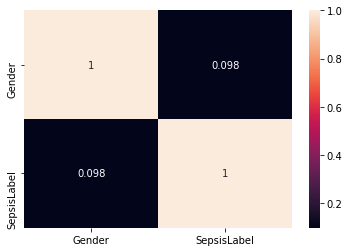

In [19]:
# Calculate correlation between ordinal & ordinal variables using Cramer's V
# (to be tested)
# Extract ordinal columns from dataframe
bool_cols = [col for col in df if df[col].dropna().value_counts().index.isin([0,1]).all()]
ordinal_cols = df.select_dtypes(include=[np.integer]) # fix to subtract off boolean columns
corr = pd.DataFrame(index = ordinal_cols, columns = ordinal_cols, dtype = 'int64')
for i in range(0,len(ordinal_cols)):
    for j in range(i,len(ordinal_cols)):
        if i == j:                 
            corr[ordinal_cols[i]][ordinal_cols[j]] = 1.0            
        else:            
            val = cramers_phi(df[ordinal_cols[i]], df[ordinal_cols[j]]) 
            corr[ordinal_cols[i]][ordinal_cols[j]] = val
            corr[ordinal_cols[j]][ordinal_cols[i]] = val
           
# Plot the correlation matrix
sns.heatmap(corr, annot = True) 

In [ ]:
# Hierachichal clustering features using correlation matrix
# Source: https://github.com/TheLoneNut/CorrelationMatrixClustering/blob/master/CorrelationMatrixClustering.ipynb

In [ ]:
# Generate cluster scores for each cluster of features (to be implemented)

In [ ]:
# Machine learning classification model built and tested using stratified Group-k-fold
# cross-validation
# (to be implemented and tested)